In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: d:\code\projects\rapget-translation


In [32]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: d:\code\projects\rapget-translation\.env


True

In [33]:
import os

model_name = os.getenv("MODEL_NAME")
adapter_name_or_path = os.getenv("ADAPTER_NAME_OR_PATH")
load_in_4bit = os.getenv("LOAD_IN_4BIT") == "true"
data_path = os.getenv("DATA_PATH")
results_path = "results/mac-results_fine_tuned.csv"  # os.getenv("RESULTS_PATH")
use_english_datasets = os.getenv("USE_ENGLISH_DATASETS") == "true"
max_new_tokens = int(os.getenv("MAX_NEW_TOKENS", 2048))

print(model_name, adapter_name_or_path, load_in_4bit, data_path, results_path, use_english_datasets, max_new_tokens)

gpt-4o None True datasets/mac/mac.tsv results/mac-results_fine_tuned.csv False 300


In [34]:
import pandas as pd
from llm_toolkit.llm_utils import *
from llm_toolkit.translation_utils import *

df = pd.read_csv(results_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 16 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   chinese                                              1133 non-null   object
 1   english                                              1133 non-null   object
 2   internlm/internlm2_5-7b-chat/epochs-01               1133 non-null   object
 3   Qwen/Qwen2-7B-Instruct/epochs-01                     1133 non-null   object
 4   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/epochs-01  1133 non-null   object
 5   shenzhi-wang/Llama3.1-8B-Chinese-Chat/epochs-01      1133 non-null   object
 6   internlm/internlm2_5-7b-chat/epochs-02               1133 non-null   object
 7   internlm/internlm2_5-7b-chat/epochs-03               1133 non-null   object
 8   internlm/internlm2_5-7b-chat/epochs-04               1133 non-null   object
 9

In [35]:
result_columns = df.columns[2:].to_list()
result_columns.sort()
result_columns

['Qwen/Qwen2-7B-Instruct/epochs-01',
 'Qwen/Qwen2-7B-Instruct/epochs-02',
 'Qwen/Qwen2-7B-Instruct/epochs-03',
 'Qwen/Qwen2-7B-Instruct/epochs-04',
 'Qwen/Qwen2-7B-Instruct/epochs-05',
 'Qwen/Qwen2-7B-Instruct/epochs-06',
 'internlm/internlm2_5-7b-chat/epochs-01',
 'internlm/internlm2_5-7b-chat/epochs-02',
 'internlm/internlm2_5-7b-chat/epochs-03',
 'internlm/internlm2_5-7b-chat/epochs-04',
 'internlm/internlm2_5-7b-chat/epochs-05',
 'internlm/internlm2_5-7b-chat/epochs-06',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/epochs-01',
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/epochs-01']

In [36]:
columns = df.columns[:2].to_list() + result_columns
df = df[columns]
columns = df.columns.to_list()
result_columns = df.columns[2:].to_list()
result_columns, columns

(['Qwen/Qwen2-7B-Instruct/epochs-01',
  'Qwen/Qwen2-7B-Instruct/epochs-02',
  'Qwen/Qwen2-7B-Instruct/epochs-03',
  'Qwen/Qwen2-7B-Instruct/epochs-04',
  'Qwen/Qwen2-7B-Instruct/epochs-05',
  'Qwen/Qwen2-7B-Instruct/epochs-06',
  'internlm/internlm2_5-7b-chat/epochs-01',
  'internlm/internlm2_5-7b-chat/epochs-02',
  'internlm/internlm2_5-7b-chat/epochs-03',
  'internlm/internlm2_5-7b-chat/epochs-04',
  'internlm/internlm2_5-7b-chat/epochs-05',
  'internlm/internlm2_5-7b-chat/epochs-06',
  'shenzhi-wang/Llama3.1-8B-Chinese-Chat/epochs-01',
  'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/epochs-01'],
 ['chinese',
  'english',
  'Qwen/Qwen2-7B-Instruct/epochs-01',
  'Qwen/Qwen2-7B-Instruct/epochs-02',
  'Qwen/Qwen2-7B-Instruct/epochs-03',
  'Qwen/Qwen2-7B-Instruct/epochs-04',
  'Qwen/Qwen2-7B-Instruct/epochs-05',
  'Qwen/Qwen2-7B-Instruct/epochs-06',
  'internlm/internlm2_5-7b-chat/epochs-01',
  'internlm/internlm2_5-7b-chat/epochs-02',
  'internlm/internlm2_5-7b-chat/epochs-03',
  'internlm

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 16 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   chinese                                              1133 non-null   object
 1   english                                              1133 non-null   object
 2   Qwen/Qwen2-7B-Instruct/epochs-01                     1133 non-null   object
 3   Qwen/Qwen2-7B-Instruct/epochs-02                     1133 non-null   object
 4   Qwen/Qwen2-7B-Instruct/epochs-03                     1133 non-null   object
 5   Qwen/Qwen2-7B-Instruct/epochs-04                     1133 non-null   object
 6   Qwen/Qwen2-7B-Instruct/epochs-05                     1133 non-null   object
 7   Qwen/Qwen2-7B-Instruct/epochs-06                     1133 non-null   object
 8   internlm/internlm2_5-7b-chat/epochs-01               1133 non-null   object
 9

In [38]:
variant = "epochs"
metrics_df = get_metrics(df, max_output_tokens=max_new_tokens, variant=variant)
metrics_df

Qwen/Qwen2-7B-Instruct/epochs-01: {'meteor': 0.4067704621958429, 'bleu_scores': {'bleu': 0.13127239146658307, 'precisions': [0.48056287825344374, 0.19647286821705426, 0.09708541083951518, 0.05254885301614273], 'brevity_penalty': 0.8860962371419981, 'length_ratio': 0.8921165948989732, 'translation_length': 26933, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.44679142818412654, 'rouge2': 0.20156388938014652, 'rougeL': 0.39237981998987037, 'rougeLsum': 0.39173707116766254}, 'accuracy': 0.01059135039717564, 'correct_ids': [77, 240, 272, 348, 364, 533, 567, 659, 668, 778, 893, 1011]}
Qwen/Qwen2-7B-Instruct/epochs-02: {'meteor': 0.4276774030251161, 'bleu_scores': {'bleu': 0.14782459619004226, 'precisions': [0.4736586886495099, 0.2019251568245728, 0.10351437699680512, 0.05790217476642852], 'brevity_penalty': 0.9553419091969785, 'length_ratio': 0.956310036435906, 'translation_length': 28871, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.46246313203686096, 'rouge2': 0.2206

model  epochs    meteor    bleu_1  \
0                      Qwen/Qwen2-7B-Instruct       1  0.406770  0.131272   
1                      Qwen/Qwen2-7B-Instruct       2  0.427677  0.147825   
2                      Qwen/Qwen2-7B-Instruct       3  0.444096  0.155148   
3                      Qwen/Qwen2-7B-Instruct       4  0.440138  0.152178   
4                      Qwen/Qwen2-7B-Instruct       5  0.435675  0.148230   
5                      Qwen/Qwen2-7B-Instruct       6  0.436153  0.149654   
6                internlm/internlm2_5-7b-chat       1  0.381014  0.119999   
7                internlm/internlm2_5-7b-chat       2  0.405713  0.137537   
8                internlm/internlm2_5-7b-chat       3  0.420791  0.143731   
9                internlm/internlm2_5-7b-chat       4  0.431093  0.151047   
10               internlm/internlm2_5-7b-chat       5  0.425150  0.148546   
11               internlm/internlm2_5-7b-chat       6  0.425637  0.148673   
12      shenzhi-wang/Llama3.1-8B-Chinese-Chat       1  0.390801  0.124199   
13  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       1  0.376693  0.113947   

     rouge_l  ews_score  repetition_score  total_repetitions       rap  \
0   0.392380        0.0          0.073257           0.073257  0.405485   
1   0.408822        0.0          2.097087           2.097087  0.395017   
2   0.418799        0.0          1.640777           1.640777  0.416608   
3   0.416158        0.0          0.714034           0.714034  0.427338   
4   0.406275        0.0          0.913504           0.913504  0.419740   
5   0.408144        0.0          0.167696           0.167696  0.433025   
6   0.372877        0.0          2.573698           2.573698  0.346545   
7   0.393568        0.0          1.302736           1.302736  0.385226   
8   0.404396        0.0          2.699029           2.699029  0.381230   
9   0.411595        0.0          1.598411           1.598411  0.405011   
10  0.405343        0.0          0.703442           0.703442  0.412958   
11  0.406585        0.0          0.689320           0.689320  0.413661   
12  0.368873        0.0          1.752868           1.752868  0.365185   
13  0.364586        0.0          1.105031           1.105031  0.360292   

    num_max_output_tokens  
0                       0  
1                       3  
2                       2  
3                       1  
4                       1  
5                       0  
6                       3  
7                       2  
8                       3  
9                       2  
10                      1  
11                      1  
12                      2  
13                      1

In [39]:
time_df = load_eval_times("logs", total_entries=len(df), variant=variant)
time_df

Loading content of logs\l40-1gpu-epoch-1.txt
Loading content of logs\l40-1gpu-fine-tuned.txt
Loading content of logs\l40-1gpu.txt
Error processing log file: logs\l40-1gpu.txt
'utf-8' codec can't decode byte 0xe2 in position 0: unexpected end of data
Loading content of logs\l40-4gpu-2.txt
Loading content of logs\l40-4gpu.txt
Loading content of logs\openai-gpt-4o-mini.txt
Loading content of logs\openai-gpt-4o.txt


model  epochs  eval_time
0                internlm/internlm2_5-7b-chat       1   1.536628
2   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       1   1.339806
3       shenzhi-wang/Llama3.1-8B-Chinese-Chat       1   1.254192
4                internlm/internlm2_5-7b-chat       2   1.565755
5                internlm/internlm2_5-7b-chat       3   1.598411
6                internlm/internlm2_5-7b-chat       4   1.556929
7                internlm/internlm2_5-7b-chat       5   1.578111
8                internlm/internlm2_5-7b-chat       6   1.556046
9                      Qwen/Qwen2-7B-Instruct       1   1.173875
10                     Qwen/Qwen2-7B-Instruct       2   1.263019
11                     Qwen/Qwen2-7B-Instruct       3   1.269197
12                     Qwen/Qwen2-7B-Instruct       4   1.234775
13                     Qwen/Qwen2-7B-Instruct       5   1.262136
14                     Qwen/Qwen2-7B-Instruct       6   1.238305

In [40]:
# Merge time_df into metrics_df
metrics_df.drop(columns=["eval_time"], inplace=True, errors="ignore")
metrics_df = pd.merge(metrics_df, time_df, on=["model", variant], how="left")
metrics_df

model  epochs    meteor    bleu_1  \
0                      Qwen/Qwen2-7B-Instruct       1  0.406770  0.131272   
1                      Qwen/Qwen2-7B-Instruct       2  0.427677  0.147825   
2                      Qwen/Qwen2-7B-Instruct       3  0.444096  0.155148   
3                      Qwen/Qwen2-7B-Instruct       4  0.440138  0.152178   
4                      Qwen/Qwen2-7B-Instruct       5  0.435675  0.148230   
5                      Qwen/Qwen2-7B-Instruct       6  0.436153  0.149654   
6                internlm/internlm2_5-7b-chat       1  0.381014  0.119999   
7                internlm/internlm2_5-7b-chat       2  0.405713  0.137537   
8                internlm/internlm2_5-7b-chat       3  0.420791  0.143731   
9                internlm/internlm2_5-7b-chat       4  0.431093  0.151047   
10               internlm/internlm2_5-7b-chat       5  0.425150  0.148546   
11               internlm/internlm2_5-7b-chat       6  0.425637  0.148673   
12      shenzhi-wang/Llama3.1-8B-Chinese-Chat       1  0.390801  0.124199   
13  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       1  0.376693  0.113947   

     rouge_l  ews_score  repetition_score  total_repetitions       rap  \
0   0.392380        0.0          0.073257           0.073257  0.405485   
1   0.408822        0.0          2.097087           2.097087  0.395017   
2   0.418799        0.0          1.640777           1.640777  0.416608   
3   0.416158        0.0          0.714034           0.714034  0.427338   
4   0.406275        0.0          0.913504           0.913504  0.419740   
5   0.408144        0.0          0.167696           0.167696  0.433025   
6   0.372877        0.0          2.573698           2.573698  0.346545   
7   0.393568        0.0          1.302736           1.302736  0.385226   
8   0.404396        0.0          2.699029           2.699029  0.381230   
9   0.411595        0.0          1.598411           1.598411  0.405011   
10  0.405343        0.0          0.703442           0.703442  0.412958   
11  0.406585        0.0          0.689320           0.689320  0.413661   
12  0.368873        0.0          1.752868           1.752868  0.365185   
13  0.364586        0.0          1.105031           1.105031  0.360292   

    num_max_output_tokens  eval_time  
0                       0   1.173875  
1                       3   1.263019  
2                       2   1.269197  
3                       1   1.234775  
4                       1   1.262136  
5                       0   1.238305  
6                       3   1.536628  
7                       2   1.565755  
8                       3   1.598411  
9                       2   1.556929  
10                      1   1.578111  
11                      1   1.556046  
12                      2   1.254192  
13                      1   1.339806

In [41]:
models = metrics_df["model"].unique()
models

array(['Qwen/Qwen2-7B-Instruct', 'internlm/internlm2_5-7b-chat',
       'shenzhi-wang/Llama3.1-8B-Chinese-Chat',
       'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat'], dtype=object)

In [42]:
df_few_shots = pd.read_csv("results/mac-results_few_shots_metrics.csv")
df_few_shots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   model                  47 non-null     object 
 1   shots                  47 non-null     int64  
 2   meteor                 47 non-null     float64
 3   bleu_1                 47 non-null     float64
 4   rouge_l                47 non-null     float64
 5   ews_score              47 non-null     float64
 6   repetition_score       47 non-null     float64
 7   total_repetitions      47 non-null     float64
 8   rap                    47 non-null     float64
 9   num_max_output_tokens  47 non-null     int64  
 10  eval_time              45 non-null     float64
dtypes: float64(8), int64(2), object(1)
memory usage: 4.2+ KB


In [43]:
temp = df_few_shots[df_few_shots["model"].isin(models)]
df_base = temp[temp["shots"] == 0].rename(columns={"shots": variant})
df_base

model  epochs    meteor    bleu_1  \
6                      Qwen/Qwen2-7B-Instruct       0  0.377477  0.117835   
12               internlm/internlm2_5-7b-chat       0  0.368168  0.113605   
23      shenzhi-wang/Llama3.1-8B-Chinese-Chat       0  0.347622  0.097994   
29  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       0  0.328500  0.083138   

     rouge_l  ews_score  repetition_score  total_repetitions       rap  \
6   0.368091        0.0          0.071492           0.071492  0.376313   
12  0.360329        0.0          0.214475           0.214475  0.364806   
23  0.334949        0.0          2.216240           2.216240  0.319818   
29  0.318338        0.0          0.127979           0.127979  0.326695   

    num_max_output_tokens  eval_time  
6                       0   0.980583  
12                      0   1.224184  
23                      2   1.075022  
29                      0   1.204766

In [44]:
metrics_df = pd.concat([df_base, metrics_df], ignore_index=True)
metrics_df

model  epochs    meteor    bleu_1  \
0                      Qwen/Qwen2-7B-Instruct       0  0.377477  0.117835   
1                internlm/internlm2_5-7b-chat       0  0.368168  0.113605   
2       shenzhi-wang/Llama3.1-8B-Chinese-Chat       0  0.347622  0.097994   
3   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       0  0.328500  0.083138   
4                      Qwen/Qwen2-7B-Instruct       1  0.406770  0.131272   
5                      Qwen/Qwen2-7B-Instruct       2  0.427677  0.147825   
6                      Qwen/Qwen2-7B-Instruct       3  0.444096  0.155148   
7                      Qwen/Qwen2-7B-Instruct       4  0.440138  0.152178   
8                      Qwen/Qwen2-7B-Instruct       5  0.435675  0.148230   
9                      Qwen/Qwen2-7B-Instruct       6  0.436153  0.149654   
10               internlm/internlm2_5-7b-chat       1  0.381014  0.119999   
11               internlm/internlm2_5-7b-chat       2  0.405713  0.137537   
12               internlm/internlm2_5-7b-chat       3  0.420791  0.143731   
13               internlm/internlm2_5-7b-chat       4  0.431093  0.151047   
14               internlm/internlm2_5-7b-chat       5  0.425150  0.148546   
15               internlm/internlm2_5-7b-chat       6  0.425637  0.148673   
16      shenzhi-wang/Llama3.1-8B-Chinese-Chat       1  0.390801  0.124199   
17  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       1  0.376693  0.113947   

     rouge_l  ews_score  repetition_score  total_repetitions       rap  \
0   0.368091        0.0          0.071492           0.071492  0.376313   
1   0.360329        0.0          0.214475           0.214475  0.364806   
2   0.334949        0.0          2.216240           2.216240  0.319818   
3   0.318338        0.0          0.127979           0.127979  0.326695   
4   0.392380        0.0          0.073257           0.073257  0.405485   
5   0.408822        0.0          2.097087           2.097087  0.395017   
6   0.418799        0.0          1.640777           1.640777  0.416608   
7   0.416158        0.0          0.714034           0.714034  0.427338   
8   0.406275        0.0          0.913504           0.913504  0.419740   
9   0.408144        0.0          0.167696           0.167696  0.433025   
10  0.372877        0.0          2.573698           2.573698  0.346545   
11  0.393568        0.0          1.302736           1.302736  0.385226   
12  0.404396        0.0          2.699029           2.699029  0.381230   
13  0.411595        0.0          1.598411           1.598411  0.405011   
14  0.405343        0.0          0.703442           0.703442  0.412958   
15  0.406585        0.0          0.689320           0.689320  0.413661   
16  0.368873        0.0          1.752868           1.752868  0.365185   
17  0.364586        0.0          1.105031           1.105031  0.360292   

    num_max_output_tokens  eval_time  
0                       0   0.980583  
1                       0   1.224184  
2                       2   1.075022  
3                       0   1.204766  
4                       0   1.173875  
5                       3   1.263019  
6                       2   1.269197  
7                       1   1.234775  
8                       1   1.262136  
9                       0   1.238305  
10                      3   1.536628  
11                      2   1.565755  
12                      3   1.598411  
13                      2   1.556929  
14                      1   1.578111  
15                      1   1.556046  
16                      2   1.254192  
17                      1   1.339806

In [45]:
# sort metrics_df by model and epochs
metrics_df.sort_values(["model", variant], inplace=True)
metrics_df

model  epochs    meteor    bleu_1  \
0                      Qwen/Qwen2-7B-Instruct       0  0.377477  0.117835   
4                      Qwen/Qwen2-7B-Instruct       1  0.406770  0.131272   
5                      Qwen/Qwen2-7B-Instruct       2  0.427677  0.147825   
6                      Qwen/Qwen2-7B-Instruct       3  0.444096  0.155148   
7                      Qwen/Qwen2-7B-Instruct       4  0.440138  0.152178   
8                      Qwen/Qwen2-7B-Instruct       5  0.435675  0.148230   
9                      Qwen/Qwen2-7B-Instruct       6  0.436153  0.149654   
1                internlm/internlm2_5-7b-chat       0  0.368168  0.113605   
10               internlm/internlm2_5-7b-chat       1  0.381014  0.119999   
11               internlm/internlm2_5-7b-chat       2  0.405713  0.137537   
12               internlm/internlm2_5-7b-chat       3  0.420791  0.143731   
13               internlm/internlm2_5-7b-chat       4  0.431093  0.151047   
14               internlm/internlm2_5-7b-chat       5  0.425150  0.148546   
15               internlm/internlm2_5-7b-chat       6  0.425637  0.148673   
2       shenzhi-wang/Llama3.1-8B-Chinese-Chat       0  0.347622  0.097994   
16      shenzhi-wang/Llama3.1-8B-Chinese-Chat       1  0.390801  0.124199   
3   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       0  0.328500  0.083138   
17  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       1  0.376693  0.113947   

     rouge_l  ews_score  repetition_score  total_repetitions       rap  \
0   0.368091        0.0          0.071492           0.071492  0.376313   
4   0.392380        0.0          0.073257           0.073257  0.405485   
5   0.408822        0.0          2.097087           2.097087  0.395017   
6   0.418799        0.0          1.640777           1.640777  0.416608   
7   0.416158        0.0          0.714034           0.714034  0.427338   
8   0.406275        0.0          0.913504           0.913504  0.419740   
9   0.408144        0.0          0.167696           0.167696  0.433025   
1   0.360329        0.0          0.214475           0.214475  0.364806   
10  0.372877        0.0          2.573698           2.573698  0.346545   
11  0.393568        0.0          1.302736           1.302736  0.385226   
12  0.404396        0.0          2.699029           2.699029  0.381230   
13  0.411595        0.0          1.598411           1.598411  0.405011   
14  0.405343        0.0          0.703442           0.703442  0.412958   
15  0.406585        0.0          0.689320           0.689320  0.413661   
2   0.334949        0.0          2.216240           2.216240  0.319818   
16  0.368873        0.0          1.752868           1.752868  0.365185   
3   0.318338        0.0          0.127979           0.127979  0.326695   
17  0.364586        0.0          1.105031           1.105031  0.360292   

    num_max_output_tokens  eval_time  
0                       0   0.980583  
4                       0   1.173875  
5                       3   1.263019  
6                       2   1.269197  
7                       1   1.234775  
8                       1   1.262136  
9                       0   1.238305  
1                       0   1.224184  
10                      3   1.536628  
11                      2   1.565755  
12                      3   1.598411  
13                      2   1.556929  
14                      1   1.578111  
15                      1   1.556046  
2                       2   1.075022  
16                      2   1.254192  
3                       0   1.204766  
17                      1   1.339806

In [46]:
# list of markers for plotting
markers = ["o", "x", "^", "s", "d", "P", "X", "*", "v", ">", "<", "p", "h", "H", "+", "|", "_"]
markers = {model: marker for model, marker in zip(models, markers)}

In [47]:
model_orders = {
    "internlm/internlm2_5-7b-chat": 10,
    "Qwen/Qwen2-7B-Instruct": 20,
    "shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat": 30,
    "shenzhi-wang/Llama3.1-8B-Chinese-Chat": 40,
    "shenzhi-wang/Llama3.1-70B-Chinese-Chat": 50,
    "Qwen/Qwen2-72B-Instruct": 60,
    "gpt-4o-mini": 99,
    "gpt-4o": 100,
}

In [48]:
# plot mtr vs rpp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


def plot_metrics_vs_shots(metrics_df, models, markers, columns, titles, log_scales=[False, False], sync_y_axis=False):
    fig, ax = plt.subplots(figsize=(10, 6))
    # set grid
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which="major", linestyle="-", linewidth="0.5", color="red")

    # Create a mapping from original x-values to new, evenly spaced x-values
    original_x_values = sorted(metrics_df[variant].unique())
    new_x_values = range(len(original_x_values))
    x_mapping = dict(zip(original_x_values, new_x_values))

    if len(columns) > 1:
        twin = ax.twinx()

    for model in models:
        model_df = metrics_df[metrics_df["model"] == model]
        transformed_x = [x_mapping[x] for x in model_df[variant]]
        for i, column in enumerate(columns):
            current_ax =  twin if i > 0 else ax
            current_ax.plot(
                transformed_x,
                model_df[column],
                label=model + f" [{titles[i]}]" if titles else "",
                marker=markers[model],
                linestyle="--" if i > 0 else "-",
            )
            current_ax.set_ylabel(titles[i])
            if log_scales[i]:
                current_ax.set_yscale("log")

    if sync_y_axis:
        ax.set_ylim(
            min(ax.get_ylim()[0], twin.get_ylim()[0]),
            max(ax.get_ylim()[1], twin.get_ylim()[1]),
        )
        twin.set_ylim(ax.get_ylim())

    # Set the x-axis ticks to be evenly spaced
    ax.xaxis.set_major_locator(ticker.FixedLocator(new_x_values))

    # Set custom labels for the ticks
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(original_x_values))

    # ax.set_ylim(0, 1)
    ax.set_xlabel("Epoch (0: Base, 1-6: Fine-tuned)")
    handles, labels = ax.get_legend_handles_labels()

    if len(columns) > 1:
        handles_twin, labels_twin = twin.get_legend_handles_labels()
        handles += handles_twin
        labels += labels_twin

    # Sort the handles and labels by labels
    sorted_handles_labels = sorted(zip(labels, handles), key=lambda x: model_orders[x[0].split(" ")[0]])
    sorted_labels, sorted_handles = zip(*sorted_handles_labels)

    # Create a combined legend
    ax.legend(
        sorted_handles,
        sorted_labels,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.85 if len(columns) > 1 else -0.5),
    )

    plt.show()

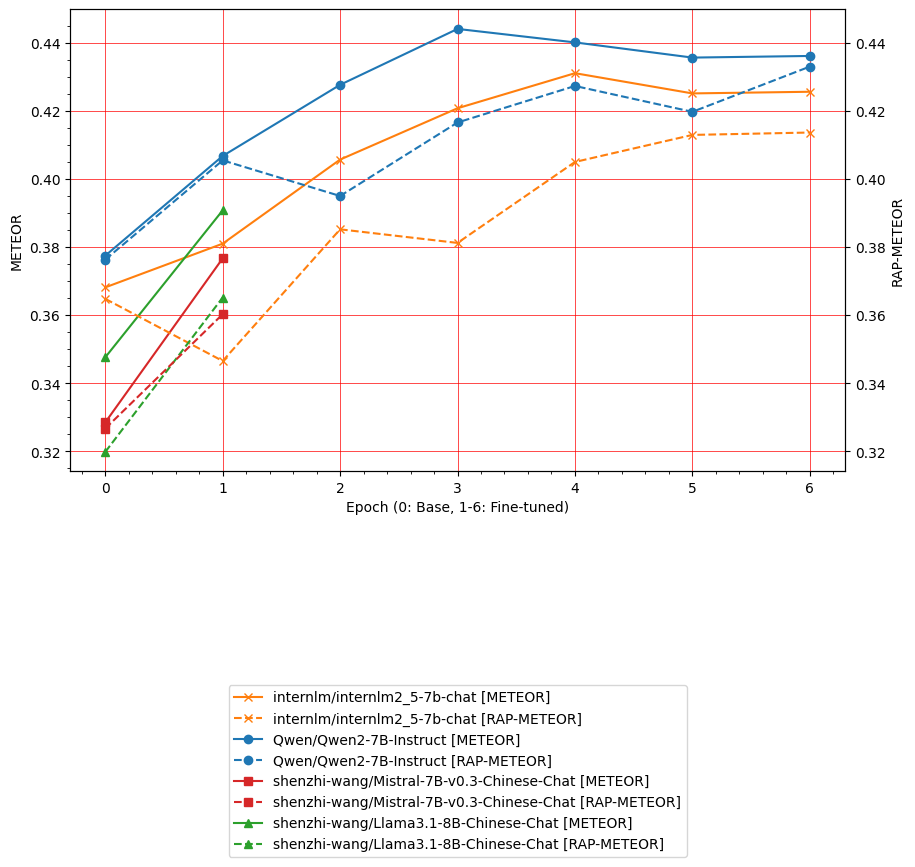

In [49]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor", "rap"],
    ["METEOR", "RAP-METEOR"],
    sync_y_axis=True,
)

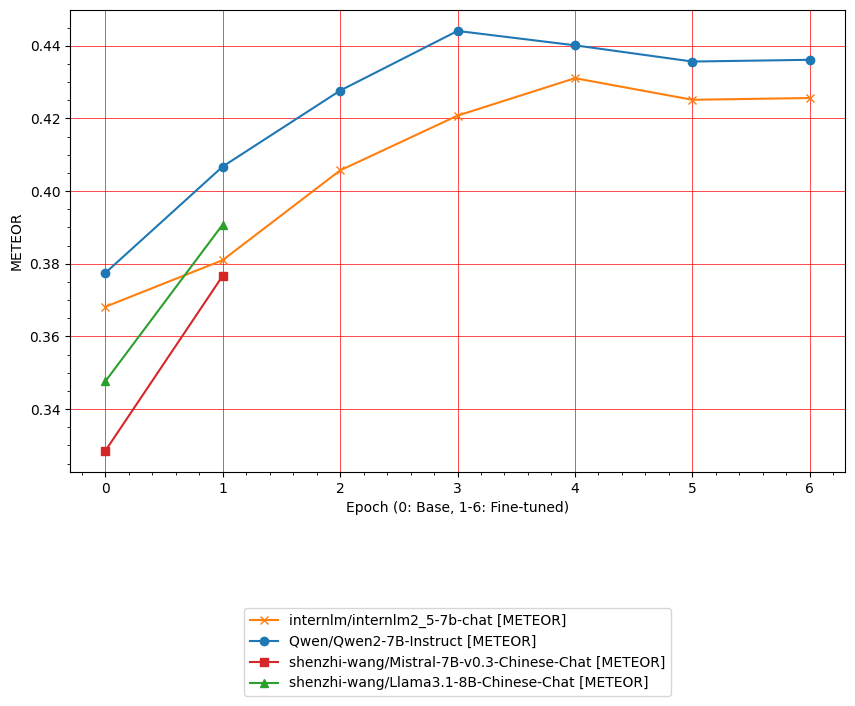

In [50]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor"],
    ["METEOR"],
)

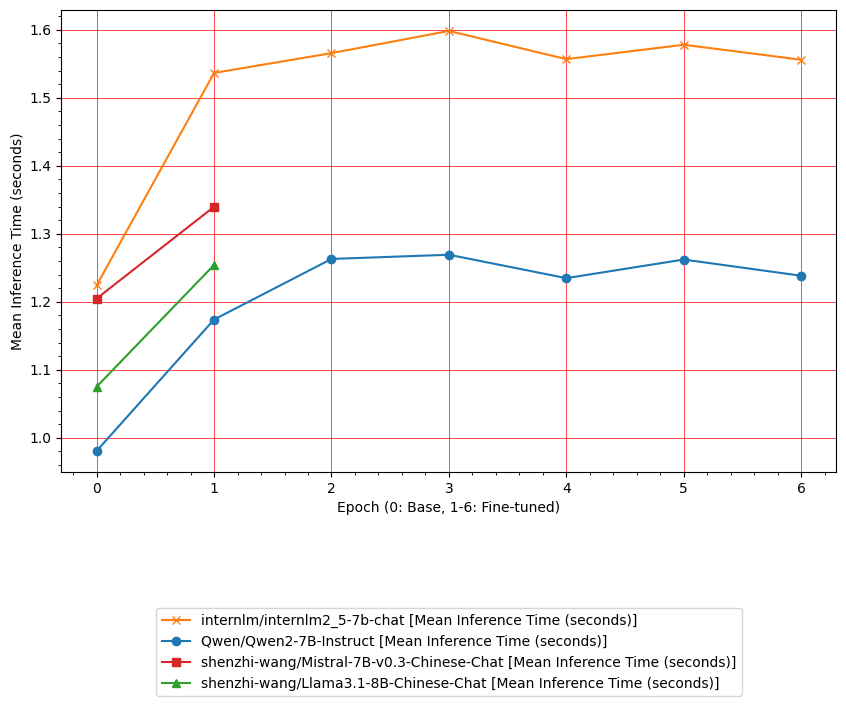

In [51]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["eval_time"],
    ["Mean Inference Time (seconds)"],
)

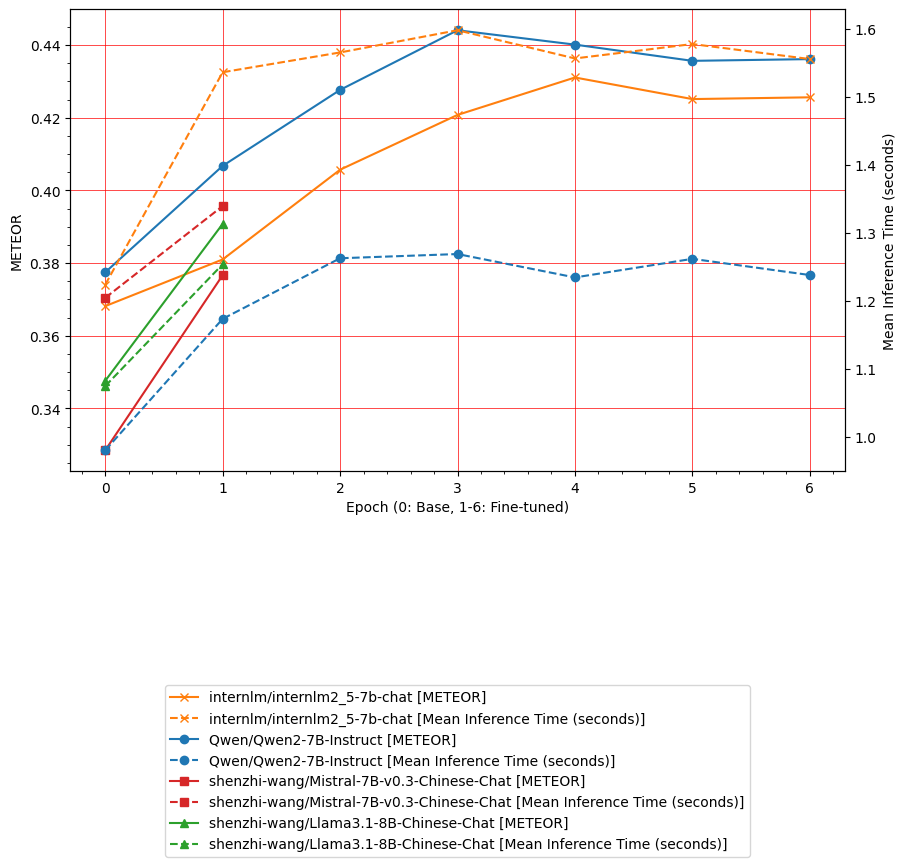

In [52]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor", "eval_time"],
    ["METEOR", "Mean Inference Time (seconds)"],
)

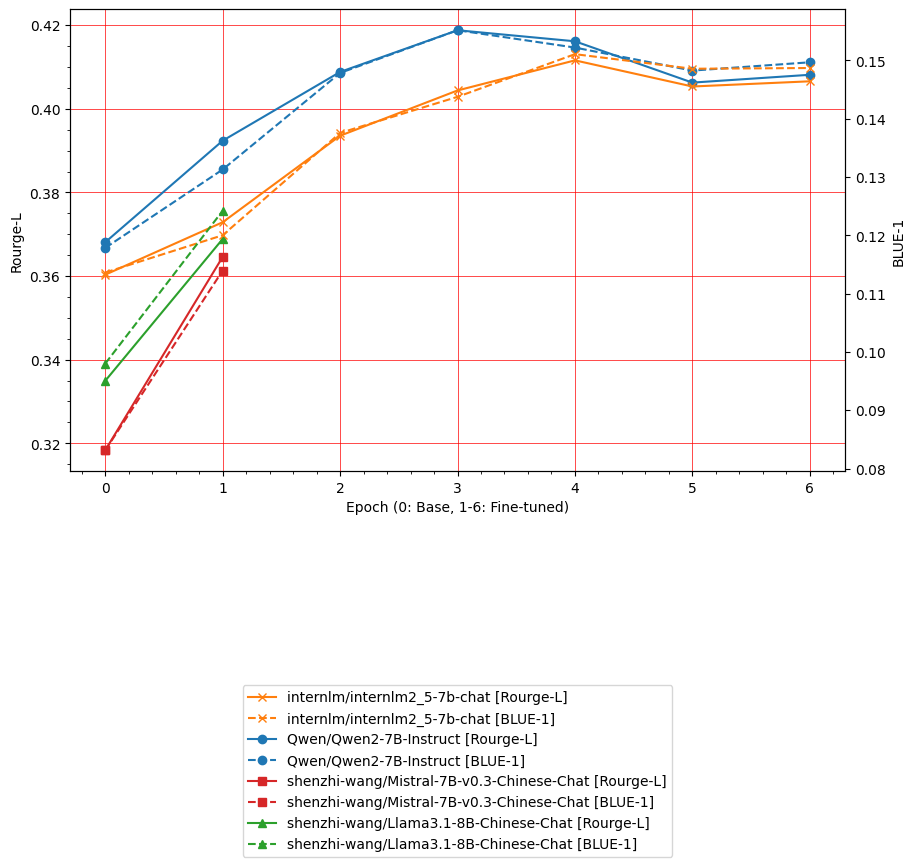

In [53]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["rouge_l", "bleu_1"],
    ["Rourge-L", "BLUE-1"],
)

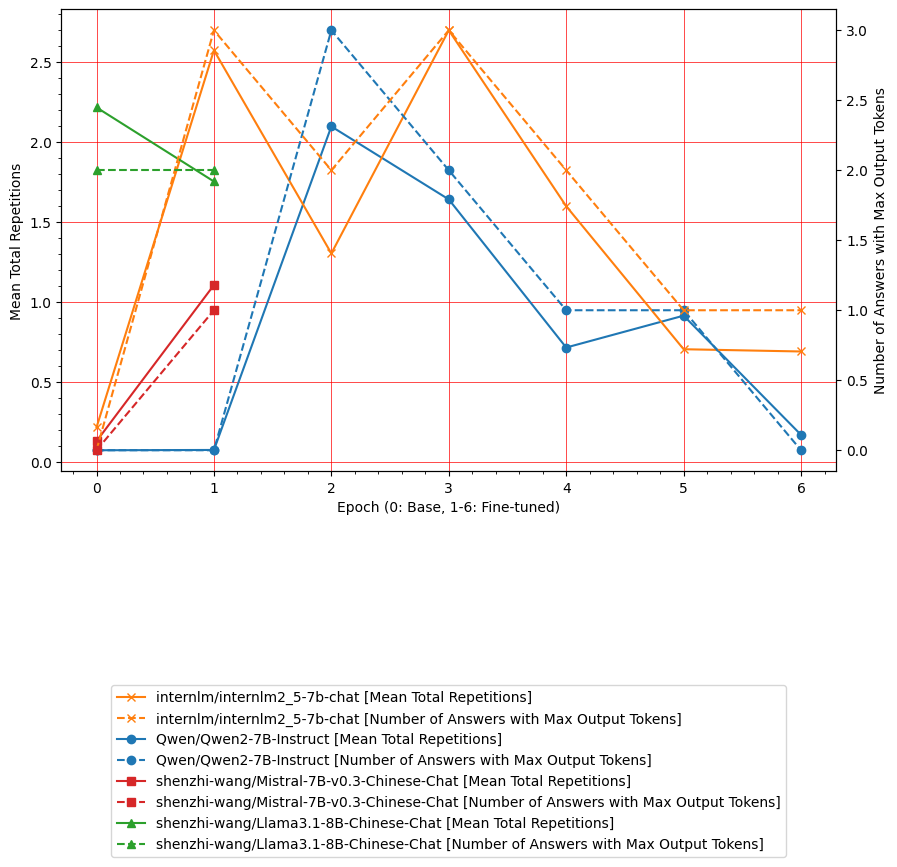

In [54]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["total_repetitions", "num_max_output_tokens"],
    ["Mean Total Repetitions", "Number of Answers with Max Output Tokens"],
)

In [55]:
for col in result_columns:
    print(f"### Analyzing: {col}")
    analyze_translation_results(df, col, repetition_threshold=50)

### Analyzing: Qwen/Qwen2-7B-Instruct/epochs-01
*** Found 0 rows with total_repetitions > 50 for Qwen/Qwen2-7B-Instruct/epochs-01

*** Found 0 rows with output_tokens >= 300 for Qwen/Qwen2-7B-Instruct/epochs-01
### Analyzing: Qwen/Qwen2-7B-Instruct/epochs-02
*** Found 3 rows with total_repetitions > 50 for Qwen/Qwen2-7B-Instruct/epochs-02
他说我以前的说话中有扬州腔调，恐怕…… 恐怕…… 那么他眼睛给我弄瞎这回事，他知不知道？”
'I thought he said just now that I used to have a Yangzhou accent. Perhaps . . . perhaps he does know that I blinded him.'
'I used to have a bit of a Yangzhou accent in my speech. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

In [56]:
metrics_df.to_csv(results_path.replace(".csv", "_metrics.csv"), index=False)

In [57]:
metrics_df.describe()

epochs     meteor     bleu_1    rouge_l  ews_score  \
count  18.000000  18.000000  18.000000  18.000000       18.0   
mean    2.444444   0.403843   0.132476   0.386673        0.0   
std     2.120550   0.034100   0.020950   0.029081        0.0   
min     0.000000   0.328500   0.083138   0.318338        0.0   
25%     1.000000   0.378361   0.118376   0.368286        0.0   
50%     2.000000   0.413781   0.140634   0.398982        0.0   
75%     4.000000   0.430239   0.148641   0.407754        0.0   
max     6.000000   0.444096   0.155148   0.418799        0.0   

       repetition_score  total_repetitions        rap  num_max_output_tokens  \
count         18.000000          18.000000  18.000000              18.000000   
mean           1.147838           1.147838   0.386386               1.333333   
std            0.879697           0.879697   0.033800               1.084652   
min            0.071492           0.071492   0.319818               0.000000   
25%            0.333186           0.333186   0.364901               0.250000   
50%            1.009267           1.009267   0.390121               1.000000   
75%            1.724846           1.724846   0.413485               2.000000   
max            2.699029           2.699029   0.433025               3.000000   

       eval_time  
count  18.000000  
mean    1.328430  
std     0.189255  
min     0.980583  
25%     1.226831  
50%     1.262577  
75%     1.551192  
max     1.598411